In [3]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [4]:
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

[INFO] accessing MNIST...
11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [6]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [7]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [8]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100
469/469 [==============================] - 4s 7ms/step - loss: 2.2745 - accuracy: 0.2008 - val_loss: 2.2365 - val_accuracy: 0.4076
Epoch 2/100
469/469 [==============================] - 4s 7ms/step - loss: 2.2018 - accuracy: 0.4147 - val_loss: 2.1585 - val_accuracy: 0.5270
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 2.1098 - accuracy: 0.5478 - val_loss: 2.0461 - val_accuracy: 0.5767
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 1.9747 - accuracy: 0.6086 - val_loss: 1.8803 - val_accuracy: 0.6336
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 1.7856 - accuracy: 0.6478 - val_loss: 1.6643 - val_accuracy: 0.6689
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 1.5623 - accuracy: 0.6781 - val_loss: 1.4376 - val_accuracy: 0.7102
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 1.3502 - accuracy: 0.7077 - val_loss: 1.

In [9]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.92      0.91      0.92      1032
           3       0.90      0.92      0.91      1010
           4       0.91      0.94      0.93       982
           5       0.91      0.86      0.89       892
           6       0.94      0.94      0.94       958
           7       0.94      0.93      0.93      1028
           8       0.90      0.89      0.90       974
           9       0.92      0.89      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



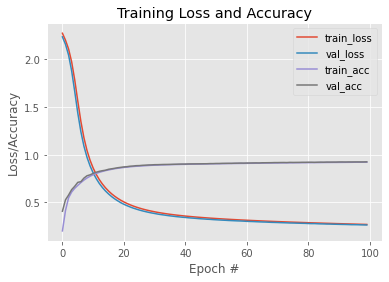

In [11]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig(args["output"])